In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
from tensorflow.keras import models
from sklearn.preprocessing import StandardScaler

In [4]:
# load forestfires dataset
dataset = pd.read_csv("forestfires.csv", delimiter=",")
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,0.00
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,0.00
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,0.00
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,0.00
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,large,6.44
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,large,54.29
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,large,11.16
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,small,0.00


In [5]:
dataset = pd.get_dummies(dataset)
dataset

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category_large,size_category_small
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,1,0,0,0,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [22]:
dataset['RH'] = dataset['RH'].astype(float)
dataset.iloc[:, 8:27] = dataset.iloc[:, 8:27].astype(float)
dataset.iloc[:, 28:49] = dataset.iloc[:, 28:49].astype(float)

In [23]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FFMC                 517 non-null    float64
 1   DMC                  517 non-null    float64
 2   DC                   517 non-null    float64
 3   ISI                  517 non-null    float64
 4   temp                 517 non-null    float64
 5   RH                   517 non-null    float64
 6   wind                 517 non-null    float64
 7   rain                 517 non-null    float64
 8   dayfri               517 non-null    float64
 9   daymon               517 non-null    float64
 10  daysat               517 non-null    float64
 11  daysun               517 non-null    float64
 12  daythu               517 non-null    float64
 13  daytue               517 non-null    float64
 14  daywed               517 non-null    float64
 15  monthapr             517 non-null    flo

In [24]:
X= dataset.drop('area', axis =1)
y= dataset['area']

In [25]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [26]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,4.874674e-17,-1.868267e-16,...,4.024290e-16,4.874674e-17,-1.868267e-16,-2.238699e-16,-6.098711e-17,-1.004999e-16,2.405125e-17,-3.843906e-17,4.763007e-16,-4.763007e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-4.435755e-01,-4.087088e-01,...,-7.060812e-01,-4.435755e-01,-4.087088e-01,-4.404491e-01,-4.744665e-01,-3.657485e-01,-3.758728e-01,-3.415123e-01,-6.064032e-01,-1.649068e+00
25%,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-4.435755e-01,-4.087088e-01,...,-7.060812e-01,-4.435755e-01,-4.087088e-01,-4.404491e-01,-4.744665e-01,-3.657485e-01,-3.758728e-01,-3.415123e-01,-6.064032e-01,-1.649068e+00
50%,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-4.435755e-01,-4.087088e-01,...,-7.060812e-01,-4.435755e-01,-4.087088e-01,-4.404491e-01,-4.744665e-01,-3.657485e-01,-3.758728e-01,-3.415123e-01,-6.064032e-01,6.064032e-01
75%,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-4.435755e-01,-4.087088e-01,...,1.416268e+00,-4.435755e-01,-4.087088e-01,-4.404491e-01,-4.744665e-01,-3.657485e-01,-3.758728e-01,-3.415123e-01,1.649068e+00,6.064032e-01
max,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,2.254407e+00,2.446730e+00,...,1.416268e+00,2.254407e+00,2.446730e+00,2.270410e+00,2.107630e+00,2.734120e+00,2.660475e+00,2.928152e+00,1.649068e+00,6.064032e-01


#### Tuning of Hyperparameters :- Batch Size and Epochs

In [27]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [31]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=48, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mse','accuracy'])
    return model

In [32]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.6s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.8s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.6s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.7s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

[CV 2/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.9s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
[CV 3/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.7s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.6s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.6s


In [33]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0347274087369442, using {'batch_size': 10, 'epochs': 100}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 10, 'epochs': 10}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 10, 'epochs': 50}
0.0347274087369442,0.04237998980614379 with: {'batch_size': 10, 'epochs': 100}
0.009708737954497337,0.01504071216418402 with: {'batch_size': 20, 'epochs': 10}
0.011650485545396804,0.01553398072719574 with: {'batch_size': 20, 'epochs': 50}
0.01553398072719574,0.01577483200057663 with: {'batch_size': 20, 'epochs': 100}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 40, 'epochs': 10}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 40, 'epochs': 50}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 40, 'epochs': 100}


#### Tuning of Hyperparameters:- Learning rate and Drop out rate

In [34]:
from tensorflow.keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 48,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse','accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size= 10,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.01,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.01, learning_rate=0.001......................
[CV 1/5; 1/9] END ....dropout_rate=0.01, learning_rate=0.001; total time=   6.6s
[CV 2/5; 1/9] START dropout_rate=0.01, learning_rate=0.001......................
[CV 2/5; 1/9] END ....dropout_rate=0.01, learning_rate=0.001; total time=   6.6s
[CV 3/5; 1/9] START dropout_rate=0.01, learning_rate=0.001......................
[CV 3/5; 1/9] END ....dropout_rate=0.01, learning_rate=0.001; total time=   6.9s
[CV 4/5; 1/9] START dropout_rate=0.01, learning_rate=0.001......................
[CV 4/5; 1/9] END ....dropout_rate=0.01, learning_rate=0.001; total time=   6.6s
[CV 5/5; 1/9] START dropout_rate=0.01, learning_rate=0.001......................
[CV 5/5; 1/9] END ....dropout_rate=0.01, learning_rate=0.001; total time=   6.6s
[CV 1/5; 2/9] START dropout_rate=0.01, learning_rate=0.01.......................
[CV 1/5; 2/9] END .....dropout_rate=0.01, learnin

In [35]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00776699036359787, using {'dropout_rate': 0.01, 'learning_rate': 0.001}
0.00776699036359787,0.01553398072719574 with: {'dropout_rate': 0.01, 'learning_rate': 0.001}
0.00776699036359787,0.01553398072719574 with: {'dropout_rate': 0.01, 'learning_rate': 0.01}
0.00776699036359787,0.01553398072719574 with: {'dropout_rate': 0.01, 'learning_rate': 0.1}
0.00776699036359787,0.01553398072719574 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.00776699036359787,0.01553398072719574 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.00776699036359787,0.01553398072719574 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.00776699036359787,0.01553398072719574 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.00776699036359787,0.01553398072719574 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.00776699036359787,0.01553398072719574 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [36]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 48,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.01))
    model.add(Dense(4,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse','accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform; total time=   3.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform; total time=   2.9s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform; total time=   2.8s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform; total time=   3.2s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform; total time=   3.3s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................
[CV 1/5; 2/12] END .activation_function=softmax,

[CV 1/5; 11/12] END .activation_function=linear, init=normal; total time=   3.1s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END .activation_function=linear, init=normal; total time=   3.0s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END .activation_function=linear, init=normal; total time=   3.1s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................
[CV 4/5; 11/12] END .activation_function=linear, init=normal; total time=   3.1s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................
[CV 5/5; 11/12] END .activation_function=linear, init=normal; total time=   3.2s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................
[CV 1/5; 12/12] END ...activation_function=linear, init=zero; total time=   3.0s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................
[CV 2/5; 12/12] END ...activ

In [38]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.04247572831809521, using {'activation_function': 'tanh', 'init': 'uniform'}
0.00776699036359787,0.01553398072719574 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.00776699036359787,0.01553398072719574 with: {'activation_function': 'softmax', 'init': 'normal'}
0.00776699036359787,0.01553398072719574 with: {'activation_function': 'softmax', 'init': 'zero'}
0.00776699036359787,0.01553398072719574 with: {'activation_function': 'relu', 'init': 'uniform'}
0.009708737954497337,0.01504071216418402 with: {'activation_function': 'relu', 'init': 'normal'}
0.00776699036359787,0.01553398072719574 with: {'activation_function': 'relu', 'init': 'zero'}
0.04247572831809521,0.044078632186847704 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.04247572831809521,0.044078632186847704 with: {'activation_function': 'tanh', 'init': 'normal'}
0.00776699036359787,0.01553398072719574 with: {'activation_function': 'tanh', 'init': 'zero'}
0.0405526515096426,0.040500835634544784 wi

#### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [39]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 48,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.01))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse','accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   2.8s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   2.7s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   2.9s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   2.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   3.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END ......................neuron1=4

In [40]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.04247572831809521, using {'neuron1': 4, 'neuron2': 2}
0.04247572831809521,0.044078632186847704 with: {'neuron1': 4, 'neuron2': 2}
0.04247572831809521,0.044078632186847704 with: {'neuron1': 4, 'neuron2': 4}
0.04247572831809521,0.044078632186847704 with: {'neuron1': 4, 'neuron2': 8}
0.04247572831809521,0.044078632186847704 with: {'neuron1': 8, 'neuron2': 2}
0.04247572831809521,0.044078632186847704 with: {'neuron1': 8, 'neuron2': 4}
0.04247572831809521,0.044078632186847704 with: {'neuron1': 8, 'neuron2': 8}
0.04247572831809521,0.044078632186847704 with: {'neuron1': 16, 'neuron2': 2}
0.04247572831809521,0.044078632186847704 with: {'neuron1': 16, 'neuron2': 4}
0.04247572831809521,0.044078632186847704 with: {'neuron1': 16, 'neuron2': 8}


#### Training model with optimum values of Hyperparameters

In [42]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(4,input_dim = 48,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.01))
    model.add(Dense(2,input_dim = 4,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.001) 
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse','accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Fitting the model

model.fit(X_standardized,y)


In [43]:
model_1 = model.fit(X_standardized,y, validation_split= 0.24, epochs= 10,batch_size=10)
model_1

dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

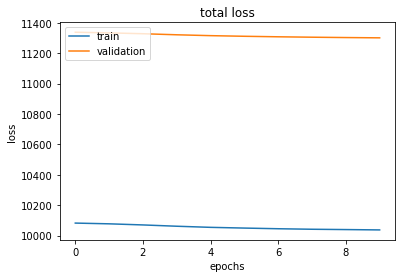

In [44]:
#Visualizing the plot between the los & val_loss::
import matplotlib.pyplot as plt
print(model_1.history.keys())

plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('total loss')
plt.xlabel("epochs")
plt.ylabel('loss')
plt.legend(['train','validation'], loc = 'upper left')
plt.show

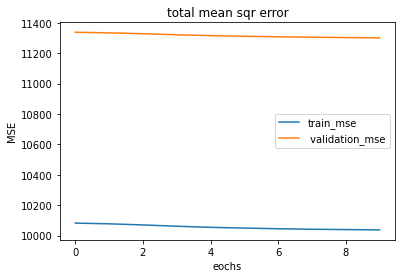

In [45]:
#Visualizing the plot between the MSE & Val_MSE::

plt.plot(model_1.history['mse'])
plt.plot(model_1.history['val_mse'])
plt.title('total mean sqr error')
plt.xlabel('eochs')
plt.ylabel('MSE')
plt.legend(['train_mse', ' validation_mse'])
plt.show()